In [20]:
import numpy as np
import torch.nn.functional as F

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:


from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [5]:
import torchvision.transforms as transforms

def get_data_loader(batch_size):
    """ Loads images of faces, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.
    Also visualize data from loader
    
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
    """

    
   #We used PyTorch's torchvision.datasets.ImageFolder to load the data from Google drive and transform to tensors fro training
    #Use this for direct transfer learning -Now we will also add rotations as aregularization step
    transform = transforms.Compose([transforms.Resize((224,224)), transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])

    # transform = transforms.Compose([transforms.Resize((128,128)), transforms.Grayscale(),transforms.RandomHorizontalFlip(),
    #                             transforms.ToTensor()])
    # transform = transforms.Compose([transforms.Resize((128,128)),
    #                                transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    
   #We will be trying some data augmentation techniques for more robust training 
    # transform = transforms.Compose([transforms.Resize((128,128)),transforms.RandomHorizontalFlip(),
    #                                transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])


    data = torchvision.datasets.ImageFolder(root="/content/gdrive/My Drive/APS 360/dataset_final",transform=transform)
    
    # Split into train and validation
    split = int(0.8 * len(data))
    
    train_size = int(0.8 * len(data))
    test_size = len(data) - train_size

    #train and test 
    train_dataset, test_dataset = torch.utils.data.random_split(data, [train_size, test_size],generator=torch.Generator().manual_seed(1000))

    #train and validation split 
    train_size_split=int(0.8 *len(train_dataset))
    validation_size_split = len(train_dataset) - train_size_split

    train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size_split, validation_size_split],generator=torch.Generator().manual_seed(1000))
    print("The length of training data set is " ,len(train_dataset))
    print("The length of the validation data set is ", len(validation_dataset))
    print("The length of the test data set is " ,len(test_dataset))

    #data loader
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size , shuffle=True)
    test_loader=torch.utils.data.DataLoader(test_dataset,batch_size,shuffle=True)
    
    #Code for visualization prior to training
    # fig=plt.figure(figsize=(20, 10))
    # k = 0
    # for images, labels in train_loader:
    #     image = images[0]
    # # place the colour channel at the end, instead of at the beginning
    #     img = np.transpose(image, [1,2,0])
    #     plt.subplot(3, 5, k+1)
    #     plt.axis('off')
    #     plt.imshow(img)
    #     plt.title((labels[0]))

    #     k += 1
    #     if k > 10:
    #         break



    return train_loader, val_loader, test_loader,train_dataset,validation_dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The length of training data set is  3840
The length of the validation data set is  960
The length of the test data set is  1200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(<torch.utils.data.dataloader.DataLoader at 0x7fbc69f5ca58>,
 <torch.utils.data.dataset.Subset at 0x7fbc69f5c9e8>)

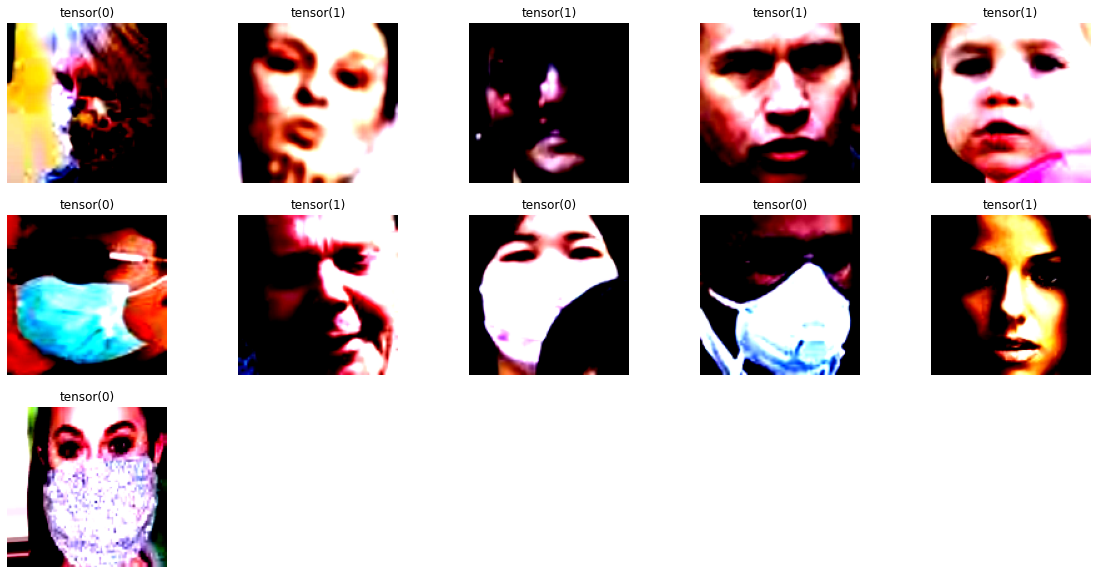

In [ ]:
#Testing our data loader function
get_data_loader(32)

In [ ]:
import time
import torch.optim as optim




def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30,large_dataset="True",train_loader_small=None,val_loader=None,test_loader=None,train_data=None,validation_data=None):
 ########################################################################
    
   
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    if(large_dataset=="True"):
       train_loader, val_loader, test_loader,train_data,validation_data = get_data_loader(batch_size)
    else:
        train_loader, val_loader, test_loader=train_loader_small,val_loader,test_loader

    
    start_time = time.time()
     
     # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    losses,iters  = [],[]
    # Set up some numpy arrays to store the training/test loss/accuracy
    train_acc = []
    val_acc = []
    torch.manual_seed(1000)



  
    
    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print(epoch)
        for i, data in enumerate(train_loader, 0):
            #############################################
            inputs, labels = data

            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
               inputs = inputs.cuda()
               labels = labels.cuda()
            #############################################
            # Get the inputs

            out = net(inputs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)

            losses.append(float(loss)/batch_size)             # compute *average* loss
            n += 1
            train_acc.append(get_accuracy(net,train_data=train_data,validation_data=validation_data, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(net,train_data=train_data,validation_data=validation_data, train=False))  # compute validation accuracy
            if(epoch%2==0 and n%10==0):
               print(get_accuracy(net,train_data=train_data,validation_data=validation_data, train=True))
               print(get_accuracy(net,train_data=train_data,validation_data=validation_data, train=False))

        
         # Save the current model (checkpoint) to a file
        if(epoch%5==0):
           model_path = get_model_name("TransferLearning_GoogleNet", batch_size, learning_rate, epoch)
           torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
            
# plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
 
   

In [ ]:



#From tutorial
def get_accuracy(model, train_data,validation_data,train=False):

    if train:
        data = train_data
    else:
        data = validation_data
    
    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=128):
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        output = model(imgs) # We don't need to run F.softmax
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path


 

In [6]:
#Using ResNet for Transfer Learning:
from torchvision import models

googlenet = models.googlenet(pretrained=True)



Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


In [ ]:
googlenet.eval()


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [7]:
#Removing the last linear layer-fc in the model-alterative way below
# classifier_name, old_classifier = ResNetmodel._modules.popitem()
# ResNetmodel.eval()
#We remove last linear layer because we will be using our own classifier
googlenet.fc = nn.Identity()



In [ ]:
# googlenet.eval()


In [ ]:
#Computing features of a sample image
train_loader, val_loader, test_loader,train_dataset,validation_dataset=get_data_loader(1)

The length of training data set is  3840
The length of the validation data set is  960
The length of the test data set is  1200


In [ ]:
i=0
for inputs, labels in (train_loader):
            #############################################
         
            print(i)
            if(i==1):
               break
            i=i+1
            #To Enable GPU Usage
            if  torch.cuda.is_available():
               inputs = inputs.cuda()
               googlenet.to('cuda')
            print('Here')
            with torch.no_grad():
                  output = googlenet(inputs)
            print(output.shape)
            print(labels)

#These are the features. The feature size is 512-we use a batch size=1 while loading data

0
Here
torch.Size([1, 1024])
tensor([1])
1


In [ ]:
#Setting a for loop to compute the features and save it to drive
#SOLUTION:to compute features-function
import os


def compute_features(train_loader):
    for i, data in enumerate(train_loader, 0):

            #############################################
            inputs, labels = data
            # if(i==1):
            #    break
            if(labels==0):
                labels='mask'
            else:
                labels='nomask'
            #To Enable GPU Usage
            if  torch.cuda.is_available():
               inputs = inputs.cuda()
              #  labels = labels.cuda()

               googlenet.to('cuda')
            
            with torch.no_grad():
                  output = googlenet(inputs)
                  #This line is NEEDED OTHER WISE ERRORS IN BACK PROPAGATION!!
                  features_tensor = torch.from_numpy(output.detach().cpu().numpy())
                  #We use torch.save to save the computed features
                  torch.save(features_tensor.squeeze(0),'/content/gdrive/MyDrive/APS 360/FeaturesGoogleNet/Test/'+(labels)  + '/' + str(i) + '.tensor')

                  



In [ ]:
compute_features(train_loader)



In [ ]:
compute_features(val_loader)

In [ ]:
compute_features(test_loader)

In [ ]:
#Now we set up a neural net classifier on top of the ResNet-this classifier uses the features computed from ResNet and traines on top of it 
torch.manual_seed(1) # set the random seed

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.layer1 = nn.Linear(1024,1000)  #Similar to ResNet 
        self.layer2 = nn.Linear(1000,2)


       
    def forward(self, img):
        flattened = img.view(-1, 1024)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        # activation2 = F.relu(activation2)
        # activation3 = self.layer3(activation2)
        activation2 = activation2.squeeze(1) # Flatten to [batch_size]


        return activation2

classifier = Classifier()


In [11]:
#We will try dropout to reduce overfit
#Now we set up a neural net classifier on top of the ResNet-this classifier uses the features computed from ResNet and traines on top of it 
torch.manual_seed(1) # set the random seed

class Classifier_withDropout(nn.Module):
    def __init__(self):
        super(Classifier_withDropout, self).__init__()
        self.layer1 = nn.Linear(1024,1000)  #Similar to ResNet 
        self.layer2 = nn.Linear(1000,2)
        self.dropout = nn.Dropout(0.2) # drop out layer with 20% dropped out neuron-To reduce overfitting!


       
    def forward(self, img):
        flattened = img.view(-1, 1024)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.dropout(self.layer2(activation1))
        # activation2 = F.relu(activation2)
        # activation3 = self.layer3(activation2)

        activation2 = activation2.squeeze(1) # Flatten to [batch_size]


        return activation2

classifier_withdropout = Classifier_withDropout()


In [8]:
# #Now we load the saved features

train_features = torchvision.datasets.DatasetFolder(root="/content/gdrive/My Drive/APS 360/FeaturesGoogleNet/Train",loader=torch.load, extensions=('.tensor'))
validation_features = torchvision.datasets.DatasetFolder(root="/content/gdrive/My Drive/APS 360/FeaturesGoogleNet/Validation",loader=torch.load, extensions=('.tensor'))
test_features = torchvision.datasets.DatasetFolder(root="/content/gdrive/My Drive/APS 360/FeaturesGoogleNet/Test",loader=torch.load, extensions=('.tensor'))





In [9]:
#data loader
train_loader_features = torch.utils.data.DataLoader(train_features, batch_size=128, shuffle=True)
val_loader_features = torch.utils.data.DataLoader(validation_features, batch_size=128 , shuffle=True)
test_loader_features=torch.utils.data.DataLoader(test_features,batch_size=128,shuffle=True)
    

In [ ]:
# #checking the features-verification
# for i, data in enumerate(train_loader_features, 0):
#             #############################################
#             if(i==1):
#               break
#             inputs, labels = data
#             print(inputs.shape)
#             print(labels.shape)

CUDA is available!  Training on GPU ...
0
0.9604166666666667
0.9604166666666667
0.9604166666666667
0.9510416666666667
0.9682291666666667
0.9697916666666667
1
2
0.9802083333333333
0.9708333333333333
0.9661458333333334
0.9583333333333334
0.9705729166666667
0.9583333333333334
3
4
0.9763020833333333
0.965625
0.9786458333333333
0.96875
0.9838541666666667
0.9708333333333333
5
6
0.9794270833333333
0.96875
0.9794270833333333
0.9708333333333333
0.97421875
0.9739583333333334
7
8
0.97421875
0.9604166666666667
0.97890625
0.9708333333333333
0.97578125
0.9510416666666667
9
10
0.9783854166666667
0.9614583333333333
0.98203125
0.9635416666666666
0.9783854166666667
0.9635416666666666
Finished Training
Total time elapsed: 1553.01 seconds


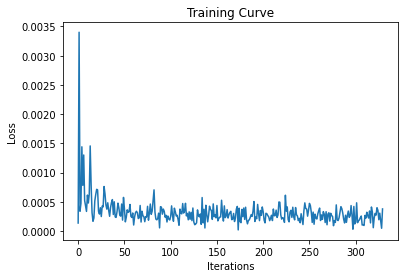

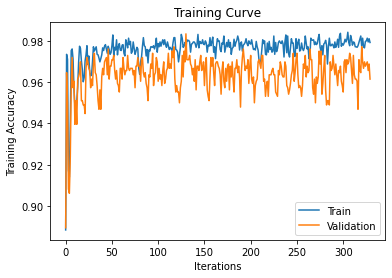

Final Training Accuracy: 0.9791666666666666
Final Validation Accuracy: 0.9614583333333333


In [ ]:
#Now lets try data augmentation to further reduce overfitting-the accuracy was low before lets increase it-change learning rate

#One more possible training to reduce overfit
#We reduced the overfit to training data set

#Finally after data augmentation!!!

use_cuda = True
import torch.nn.functional as F
if use_cuda and torch.cuda.is_available():
      classifier_withdropout.cuda()
      print('CUDA is available!  Training on GPU ...')
else:
      print('CUDA is not available.  Training on CPU ...')


  

train_net(classifier_withdropout, batch_size=128, learning_rate=0.001, num_epochs=11,
          large_dataset="False",train_loader_small=train_loader_features,val_loader=val_loader_features,test_loader=test_loader_features,train_data=train_features,validation_data=validation_features)

In [18]:
saved_model = Classifier_withDropout()
saved_model.load_state_dict((torch.load("model_TransferLearning_GoogleNet_bs128_lr0.001_epoch10")))
saved_model.eval()
saved_model=saved_model.cuda()




In [21]:
#FINAL TESTING!!
correct = 0
total = 0
for imgs, labels in torch.utils.data.DataLoader(test_features, batch_size=128):
        #############################################
        #To Enable GPU Usage
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        output = saved_model(imgs) # We don't need to run F.softmax
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]


accuracy=correct / total
print("Final test classification accuracy is",accuracy)


Final test classification accuracy is 0.98
